In [256]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Twitter
twt = Twitter()
from hanspell import spell_checker
import re
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Kkma
from sklearn.linear_model import Lasso
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
from tqdm.notebook import tqdm
#import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [257]:
df = pd.read_csv('./result/2021-03-10_21-24-03GS플래쉬.csv')
df.head()

,name,ratings,date,helpful,comment,developer_comment
0,박소영,5,2021-03-10,0,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,NaN
1,싫어함걷는것을,1,2021-03-10,0,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,NaN
2,권혁윤,5,2021-03-10,0,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,NaN
3,서승희,5,2021-03-10,0,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,NaN
4,HH Ch,5,2021-03-10,0,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,NaN


In [258]:
df.describe()

,ratings,helpful
count,9779.000000,9779.000000
mean,4.253298,0.615707
std,1.400829,3.247382
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,148.000000


In [259]:
df = df[['date', 'comment', 'ratings']]

In [260]:
df = df.dropna(axis = 0, how = 'any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9747 entries, 0 to 9778
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     9747 non-null   object
 1   comment  9747 non-null   object
 2   ratings  9747 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 304.6+ KB


In [261]:
from soyspacing.countbase import CountSpace
def 띄어쓰기(text):
    verbose=False
    mc = 10  # min_count
    ft = 0.3 # force_abs_threshold
    nt =-0.3 # nonspace_threshold
    st = 0.3 # space_threshold


    sent_corrected, tags = model.correct(
    doc=text,
    verbose=verbose,
    force_abs_threshold=ft,
    nonspace_threshold=nt,
    space_threshold=st,
    min_count=mc)
    sent_corrected, tags = model.correct(text)
    result = sent_corrected
    return result
corpus_fname = './result/134963_norm.txt'
model = CountSpace()
model.train(corpus_fname)    

df['comment'] = df['comment'].apply(lambda x: 띄어쓰기(x))
df.head()
    
    

all tags length = 694236 --> 57795, (num_doc = 15602)

,date,comment,ratings
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5


In [262]:
#맞춤법 검사기
for i in tqdm(range(len(df))): 
    try: 
        result = spell_checker.check(df['comment'][i])
        a= result[1]
        df['comment'][i] = a
    except: 
        pass



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [263]:
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') 
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result
df['ko_text'] = df['comment'].apply(lambda x: text_cleaning(x))
df.head()

,date,comment,ratings,ko_text
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ


In [264]:
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus
from soynlp.tokenizer import LTokenizer
word_extractor = WordExtractor(min_frequency=100,
   min_cohesion_forward=0.05,
   min_right_branching_entropy=0.0
)
word_extractor.train(df['ko_text'].values)
words = word_extractor.extract()
words

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)


training was done. used memory 1.821 Gbry 1.819 Gb
all cohesion probabilities was computed. # words = 355
all branching entropies was computed # words = 11886
all accessor variety was computed # words = 11886


In [265]:
df['nouns'] = df['ko_text'].apply(lambda x: tokenizer.tokenize(x, remove_r=True)) # L과 R 분리하여 R은 삭제
df

,date,comment,ratings,ko_text,nouns
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,"[설치, 오늘, 처음, 물건, 구매, 앱, 사용, 시, 크게, 불편, 점은, 없었으..."
1,2021-03-10,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음. 결국 구매 포기.,1,장바구니에 상품을 담았는데 장바구니에서 보이지가 않음 결국 구매 포기,"[장바구니, 상품, 담았는데, 장바구니, 보이지가, 않음, 결국, 구매, 포기]"
2,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[사용, 편리하고, 각종, 할인, 잘, 돼어, 있어, 좋아요]"
3,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 빠른, 언제까지나, 함께합니다]"
4,2021-03-10,잘 쓰고 있어요~신선한 상품이 많아서 좋아요 ㅎㅎ,5,잘 쓰고 있어요신선한 상품이 많아서 좋아요 ㅎㅎ,"[잘, 쓰고, 있어, 상품, 많아서, 좋아요, ㅎㅎ]"
...,...,...,...,...,...
9772,2014-02-19,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림.. 테스트도 제대로 안하고 올린듯,1,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림 테스트도 제대로 안하고 올린듯,"[가동하려면, 뭔가, 알수, 없는, 메시지를, 내며, 죽어버림, 테스트도, 제대로,..."
9774,2014-02-19,쇼핑몰앱 중 훌륭한 편입니다.,5,쇼핑몰앱 중 훌륭한 편입니다,"[쇼핑, 중, 훌륭한, 편입니다]"
9775,2014-02-19,너무 좋네요!!!! 정말저렴하네!!,5,너무 좋네요 정말저렴하네,"[너무, 좋네요, 정말]"
9776,2014-02-19,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,5,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,"[쿠폰, 많이, 주는, 것, 같고, 수퍼마켓에서도, 편하게, 쇼핑, 있을것같네요, ..."


In [266]:
df.describe()

,ratings
count,9747.000000
mean,4.255668
std,1.398413
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [267]:
df = df.reset_index()
del df['index']

In [1067]:
# 한국어 약식 불용어사전 예시 파일 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./korean_stopwords3.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(x, remove_r=True)
    nouns_tagger2 = Kkma()
    nouns = nouns_tagger2.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [1068]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
for i in tqdm(range(len(df))):
    if not df['nouns'][i]:
        df.drop([i],inplace=True)
        
df.reset_index(inplace=True)
del df['index']
print(df.shape)
df.head()


(6602, 6)


,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,[불편],1
1,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[편리, 할인]",1
2,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 배송]",1
3,2021-03-09,상품특가있다고 해서 주문했는데 너무 좋아요,5,상품특가있다고 해서 주문했는데 너무 좋아요,"[상품특가, 특가]",1
4,2021-03-09,"행사,기획상품&쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠...",5,행사기획상품쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠줘 ...,"[행사기획상품쿠폰, 쿠폰, 실질적, 요구, 영향, 구매자자로, 자로, 편리]",1


In [1069]:
all_words = []
satisfaction= []
for i in range(len(df)):
    words = df['nouns'][i]
    words_arr = []
    for n in words:
        words_arr.append(n)
        satisfaction.append(df['ratings'].iloc[i])
    all_words.extend(words_arr)
    
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()        
    

,words,satisfaction,count
0,불편,5,1
1,편리,5,1
2,할인,5,1
3,쿠폰,5,1
4,배송,5,1


In [1070]:
words_satisfaction = all_words_df.groupby('words').mean()['satisfaction']
words_count = all_words_df.groupby('words').sum()['count']
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head(20)

,satisfaction,count
words,,
ㅎ감사,5.000000,1
가격,4.739759,415
가격대,4.666667,3
가격대비,4.923077,13
가격만족,5.000000,1
가격비교,4.142857,7
가격선,5.000000,1
가격설명,4.000000,1
가격세일,5.000000,1


In [1071]:
words_df = words_df.loc[words_df['count']>=3]
words_df.sort_values('satisfaction', ascending=False)

,satisfaction,count
words,,
휴일,5.0,3
데이,5.0,3
시간내서,5.0,3
식비,5.0,3
식자,5.0,3
...,...,...
앱실행,1.0,3
워드,1.0,3
앱카드,1.0,3


In [1072]:
words_df.sort_values('count', ascending =False).head(20)

,satisfaction,count
words,,
배송,4.618847,1422
편리,4.808071,1016
할인,4.646266,964
쿠폰,4.271772,666
다양,4.856842,475
가격,4.739759,415
결제,3.324405,336
이벤트,4.700000,330
세일,4.509202,326


In [1073]:
korean_stopwords_path = "./korean_stopwords3.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
nouns_tagger =Kkma()
def text_cleaning(text):
    hangul = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    nouns_tagger = tokenizer
    nouns = nouns_tagger.tokenize(result, remove_r=True)
    nouns = [x for x in nouns if len(x) >1]
    nouns =[x for x in nouns if x not in stopwords]
    return nouns

vect = CountVectorizer(tokenizer= lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [1074]:
bow_vect.shape

(6602, 17113)

In [1075]:
word_count_dict = dict(zip(word_list, count_list))
print(str(word_count_dict)[:100])

{'ㅇ할인혜택도좋구요': 1, 'ㅠㅠㅎ': 1, 'ㅠㅠㅠ': 1, 'ㅠㅠㅠㅠㅠㅠㅜㅜㅜㅜㅜㅠ': 1, 'ㅠㅠ지에스좋은데': 1, 'ㅠㅡㅠ': 1, 'ㅠ판매안하시죵': 1, 'ㅡㅡㅋㅋ


In [1076]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [1077]:
print(tf_idf_vect[0])

  (0, 15834)	0.5865018695325586
  (0, 10246)	0.7383366369933215
  (0, 6662)	0.33297832888674


In [1078]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100])

{6662: '불편', 10246: '없었으나', 15834: '품목이', 15584: '편리하고', 16297: '할인', 3438: '돼어', 15034: '쿠폰', 6844:


In [1079]:
df.sample(10).head()

,date,comment,ratings,ko_text,nouns,y
1558,2020-05-13,앱 결제가 시원시원 빨라서 좋네요^^,5,앱 결제가 시원시원 빨라서 좋네요,[결제],1
841,2020-08-25,첫구매 잘 했습니다. 감사합니다. 그러나 어플은 사용하기 너무 어렵습니다. 검색창에...,2,첫구매 잘 했습니다 감사합니다 그러나 어플은 사용하기 너무 어렵습니다 검색창에 타이...,"[타이핑, 백그라운드, 그라운드, 가동, 가독성]",0
2885,2019-11-28,앱이 오픈도 안되고 컴(노트북)에서도 안 열리고.. 다른 컴으로 해도 안 열리네요..,1,앱이 오픈도 안되고 컴노트북에서도 안 열리고 다른 컴으로 해도 안 열리네요,[노트북],0
1157,2020-07-02,간편가입이 좋아요,5,간편가입이 좋아요,"[간편, 간편가입]",1
1874,2020-04-13,편리하고 결재시 에러 없어요,5,편리하고 결재시 에러 없어요,"[편리, 결재]",1


<AxesSubplot:>

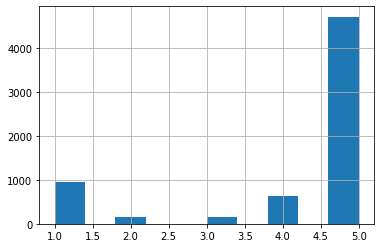

In [1080]:
df.ratings.hist()

In [1081]:
def rating_to_label(rating) :
  if rating >3:
    return 1
  else:
    return 0
df['y'] = df['ratings'].apply(lambda x : rating_to_label(x))

In [1082]:
df

,date,comment,ratings,ko_text,nouns,y
0,2021-03-10,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,5,설치하고 오늘 처음 물건 구매해봤는데 앱 사용 시 크게 불편한 점은 없었으나 품목이...,[불편],1
1,2021-03-10,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,5,사용힌기 편리하고 각종 할인이 잘 돼어 있어 좋아요,"[편리, 할인]",1
2,2021-03-10,쿠폰에 빠른배송 GS FRESH 언제까지나 함께합니다.,5,쿠폰에 빠른배송 언제까지나 함께합니다,"[쿠폰, 배송]",1
3,2021-03-09,상품특가있다고 해서 주문했는데 너무 좋아요,5,상품특가있다고 해서 주문했는데 너무 좋아요,"[상품특가, 특가]",1
4,2021-03-09,"행사,기획상품&쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠...",5,행사기획상품쿠폰과 같이 실질적으로 고객의 요구에 영향을 주는 카테고리가 잘 나눠줘 ...,"[행사기획상품쿠폰, 쿠폰, 실질적, 요구, 영향, 구매자자로, 자로, 편리]",1
...,...,...,...,...,...,...
6597,2014-02-20,편리하고 좋네요 최고어플입니다...gsisuper 애용자로써 무척반가운어플이네요....,5,편리하고 좋네요 최고어플입니다 애용자로써 무척반가운어플이네요,[편리],1
6598,2014-02-19,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림.. 테스트도 제대로 안하고 올린듯,1,가동하려면 뭔가 알수 없는 메시지를 내며 죽어버림 테스트도 제대로 안하고 올린듯,[가동],0
6599,2014-02-19,쇼핑몰앱 중 훌륭한 편입니다.,5,쇼핑몰앱 중 훌륭한 편입니다,[쇼핑몰앱],1
6600,2014-02-19,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,5,쿠폰도 많이 주는 것 같고 수퍼마켓에서도 편하게 쇼핑할수 있을것같네요 앞으로 많은 ...,[쿠폰],1


In [1083]:
df.y.value_counts()

1    5347
0    1255
Name: y, dtype: int64

In [1084]:
y= df['y']
X_train,X_test, y_train, y_test = train_test_split(tf_idf_vect, y, test_size = 0.2)

In [1085]:
print(X_test.shape)

(1321, 17113)


# 로지스틱 회귀

In [1086]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 85.16%


In [1087]:
scores = cross_val_score(lr, tf_idf_vect, y, cv=10) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))

print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.84114977 0.86081694 0.84242424 0.84848485 0.83181818 0.84090909
 0.84545455 0.81969697 0.81969697 0.81060606]
cross-val-score.mean 
0.836


In [1088]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.87      0.22      0.35       241
           1       0.85      0.99      0.92      1080

    accuracy                           0.85      1321
   macro avg       0.86      0.61      0.63      1321
weighted avg       0.85      0.85      0.81      1321



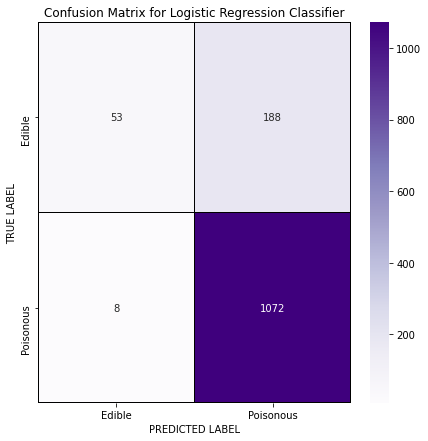

In [1089]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [1090]:
# plt.rcParams['figure.figsize'] = [10,8]
# plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [1114]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(lr.coef_[0])), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse= False)

In [1115]:
for coef in coef_pos_index[:50]:
  print(invert_index_vectorizer[coef[1]],coef[0]) #띄어쓰기 ,soynlp konlpy  한국어 

신선 3.8185347497039888
심플리쿡 3.657487117731926
편리하고 3.515296861624033
저렴 3.325491747931601
배송 3.3089337477927123
편리 3.231802830349224
할인 3.150561135253665
편리하 3.019642855571995
가격 3.014793461306163
다양한 2.7859602064741757
편하고 2.7854879104675
다양 2.710936465401339
유용 2.635091598322664
편리합니다 2.523045768339413
이벤트 2.4197614856380905
간편 2.250965822983586
편해요 2.2490748133773075
세일 2.054634098933892
혜택 1.936710103375571
빠른 1.9119058794799497
빠르고 1.9085678316936312
깔끔 1.8937687749607377
편하 1.8465319384572414
쉽게 1.7682879931578914
당일 1.7619100523988387
편하게 1.6751815196794668
편해 1.6183542596975866
많고 1.600356963977844
싸게 1.4740985222905805
쉽고 1.3428903504055025
많네요 1.221575396680332
편합니다 1.1262275649763331
싸고 1.0829276775465175
배달 1.058268751551994
특가 1.0446585367982852
품질이 0.922940949750417
쿠폰 0.806245399366454
실속있는 0.7946839403845519
편함 0.6812296714398015
실속있고 0.6669421391406746
빠르 0.6217374355748313
손쉽게 0.6076240020345423
품질 0.6046891957435676
특가땜에 0.5771782800785156
빨라서 0.5672809358044946
싼가격에 

In [1093]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

안되 -5.183093095623491
느려 -2.8306320006698664
자꾸 -2.373797560756038
느리 -2.00133766260012
오류 -1.5038049630311259
안됩니다 -1.3359569138997525
불편 -1.2090126061049677
멈추고 -1.0958056684362276
하네요 -1.068416747212576
지우고 -1.0056474513536287
결제 -0.9826438639132374
없다고 -0.9555174325817445
멈춤 -0.9165006791798999
먹통이고 -0.8692969818359771
같은 -0.8606261250804259
있다고 -0.8167741161112588
기능은 -0.8029467542753129
전혀 -0.7917901711391181
만든건지 -0.7892981096105641
좋았는데 -0.7847713451409528
나서 -0.7588981391320189
안나오네요 -0.7550516320085234
품절전화도 -0.7499675171122001
라는 -0.7492430260184848
커녕 -0.7472203899485961
답답 -0.7447813262288651
실행이 -0.7418468303417981
떨어짐 -0.7378860888966864
말라는거야 -0.7355901602518978
예전보다 -0.7342666085537335
복잡하고 -0.7305486701406234
제시간에온적이 -0.728899073436402
힘들었어요 -0.728899073436402
어렵고 -0.7255833351142276
힘드네요 -0.7126691740372731
아오 -0.7070608920181738
웹으로 -0.7033424425610182
제거하고 -0.7023630827389833
이유가 -0.6983238857386245
하래서 -0.6970067210467283
재설치중 -0.6953022070005761
없다 -0.68218480775

# 의사결정

In [1094]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [1095]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.67      0.47      0.55       241
           1       0.89      0.95      0.92      1080

    accuracy                           0.86      1321
   macro avg       0.78      0.71      0.74      1321
weighted avg       0.85      0.86      0.85      1321

Test Accuracy: 86.15%


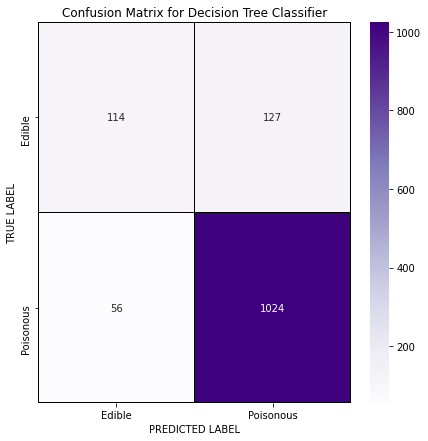

In [1096]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [1097]:
# plt.rcParams['figure.figsize'] = [10,8]
# plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)

In [1098]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(dt.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(dt.feature_importances_)), reverse= False)

In [1099]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]],coef[0])

안되 0.11538675120497675
오류 0.044518205054404514
불편 0.0316941674200455
느려 0.026489311640350018
결제 0.02176062730880651
배송 0.02047485425280153
할인 0.01583111001063706
자꾸 0.011564065774884865
저렴 0.011530995014588123
느리 0.009633595555006933
배달 0.009628096497834693
심플리쿡 0.009333675849741855
쿠폰 0.009168191179152083
간편 0.00879835318873455
없다고 0.008742359632177088
편리하고 0.008426110347999389
가격 0.007580114099475749
편하고 0.0072997475208984525
편리 0.0072775284828590124
신선 0.007151591961457929
당일 0.006811821455025118
앱이 0.006781984197115302
혜택 0.006103171021358788
다양 0.0059120962345307
편리하 0.005682396125225624
있다고 0.005453998850336609
세일 0.005152051418720455
많고 0.004977965336452875
빠른 0.0046687070337910535
유용 0.004515289907982565
편리합니다 0.004366518781640175
이벤트 0.00430656038086647
다양한 0.003991992959809761
편해요 0.0038242705533648056
편하게 0.0035063304353605703
아오 0.003288990596708931
됩니다 0.0031342315740555777
앱도 0.002522678875562144
예전보다 0.0024412118627402364
빠르 0.002388139932882651
지우고 0.002383116508828781


In [1100]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]],coef[0])

ㅠㅠㅎ 0.0
ㅠㅠㅠㅠㅠㅠㅜㅜㅜㅜㅜㅠ 0.0
ㅠㅠ지에스좋은데 0.0
ㅠㅡㅠ 0.0
ㅠ판매안하시죵 0.0
ㅡㅡㅋㅋ 0.0
ㅡㅡ개선좀해주세요 0.0
ㅡㅡ솔찍히 0.0
ㅡ곳은 0.0
ㅡ나쳐걸려서 0.0
ㅡ분걸림 0.0
ㅡ서비스는 0.0
ㅡ착한 0.0
가게되네요 0.0
가게부에 0.0
가계부에 0.0
가계에 0.0
가고 0.0
가공식품과 0.0
가공식품을 0.0
가구가 0.0
가구에게 0.0
가구요 0.0
가기가 0.0
가기도 0.0
가기에 0.0
가까운 0.0
가까운곳에 0.0
가까운곳이라 0.0
가까운매장에서 0.0
가까운매장에서바로바로받을수 0.0
가까운매장이 0.0
가까운지점에서 0.0
가까움ㅋㅋ 0.0
가까워서 0.0
가깝고 0.0
가네요 0.0
가네욬ㅋㅋㅋㅋㅋ 0.0
가느라 0.0
가는 0.0
가는거 0.0
가는것 0.0
가는게 0.0
가는데 0.0
가는하니 0.0
가다가 0.0
가독성 0.0
가독성도 0.0
가독성이 0.0
가동하는데 0.0
가동하려면 0.0
가동해야 0.0
가득 0.0
가득가득 0.0
가득하고 0.0
가득하네요 0.0
가득한 0.0
가득합니다 0.0
가득해 0.0
가뜩이나 0.0
가라고 0.0
가란다 0.0
가려가며 0.0
가려면 0.0
가려져서 0.0
가렵니다 0.0
가로에다가 0.0
가만히 0.0
가면갈수록 0.0
가방 0.0
가버리고타마트 0.0
가벼운마음으로 0.0
가벼워졌습니당 0.0
가벼워졌어요 0.0
가볍게 0.0
가볍고 0.0
가볍고빨라야지 0.0
가보니까 0.0
가보면 0.0
가봤더니 0.0
가서 0.0
가서사고말지 0.0
가서찾기눌럿더니 0.0
가성비가 0.0
가성비좋네요 0.0
가성비좋은지에스프레쉬 0.0
가시성도 0.0
가시성이 0.0
가식성이 0.0
가야할 0.0
가야했는데 0.0
가있어서 0.0
가장많이 0.0
가장자리에 0.0
가장처음이편리했어요 0.0
가전제품이 0.0
가점 0.0
가정경제에도 0.0
가정에 0.0
가정에서 0.0


# KNN

In [1101]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 98.92%


In [1102]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))


KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.20      0.00      0.01       241
           1       0.82      1.00      0.90      1080

    accuracy                           0.82      1321
   macro avg       0.51      0.50      0.45      1321
weighted avg       0.70      0.82      0.74      1321



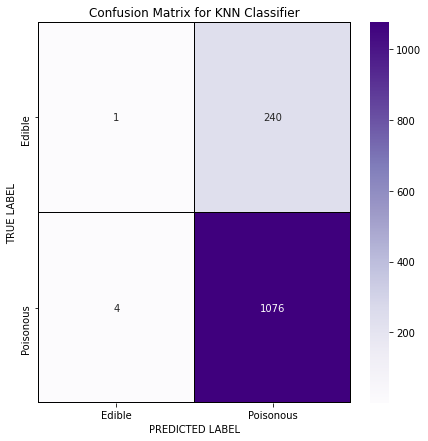

In [1103]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# svm

In [1104]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))


Test Accuracy: 81.76%


In [1105]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       241
           1       0.82      1.00      0.90      1080

    accuracy                           0.82      1321
   macro avg       0.41      0.50      0.45      1321
weighted avg       0.67      0.82      0.74      1321



D:\programfiles\anaconda3\envs\pythonopencv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


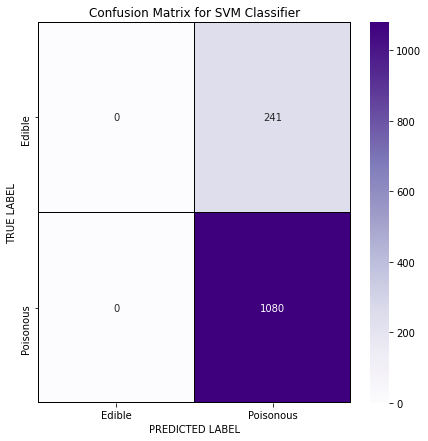

In [1106]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

# 랜덤포레스트

In [1107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 86.75%


In [1108]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.81      0.36      0.50       241
           1       0.87      0.98      0.92      1080

    accuracy                           0.87      1321
   macro avg       0.84      0.67      0.71      1321
weighted avg       0.86      0.87      0.85      1321



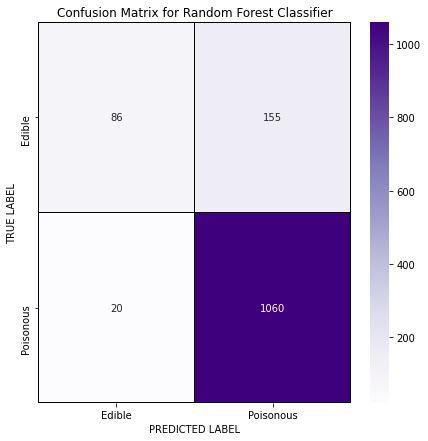

In [1109]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [1110]:
# plt.rcParams['figure.figsize'] = [10,8]
# plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

In [1111]:
coef_pos_index = sorted(((value, index ) for index, value in enumerate(rf.feature_importances_)), reverse=True)
coef_neg_index = sorted(((value,index) for index, value in enumerate(rf.feature_importances_)), reverse= False)

In [1112]:
for coef in coef_pos_index[:100]:
  print(invert_index_vectorizer[coef[1]], coef[0])

안되 0.05370818727517311
오류 0.017902450561013892
느려 0.012727673196010746
불편 0.01246370184507404
배송 0.012183636340536496
할인 0.012043394999911212
자꾸 0.010561580334228854
결제 0.010242034907983468
느리 0.007589010435940648
신선 0.0072357462524174675
저렴 0.0064286247159428475
편리하고 0.006108443228859595
안됩니다 0.00586915815355707
편리 0.005853265556453905
가격 0.0050225587074651185
앱이 0.0050077098032892085
심플리쿡 0.004533449261495344
없다고 0.004527579166248609
이벤트 0.004081112917504558
편리하 0.003995835308569304
간편 0.0038862110170830963
지우고 0.0034970822505875064
다양 0.0034102146913549255
편하고 0.003126504815858207
다양한 0.0030650853019420104
빠르고 0.0029889599176339612
빠른 0.0023653345491627116
멈추고 0.0023371990281641874
나서 0.002233723532502721
쿠폰 0.0022310525977477028
유용 0.0021429042617755814
하네요 0.0020991547696386638
당일 0.001976970409565176
있다고 0.0019424403965367489
전혀 0.0018819990132854507
혜택 0.001860376603613597
많고 0.0018329551783822162
편하게 0.0018313604542494902
세일 0.0016676022715626608
뭐가 0.0016563312856625035
편리합니다 

In [1113]:
for coef in coef_neg_index[:100]:
  print(invert_index_vectorizer[coef[1]],coef[0])

ㅠ판매안하시죵 0.0
ㅡㅡ개선좀해주세요 0.0
ㅡㅡ솔찍히 0.0
가게부에 0.0
가공식품과 0.0
가구가 0.0
가까운곳이라 0.0
가까운매장에서바로바로받을수 0.0
가까운매장이 0.0
가까운지점에서 0.0
가느라 0.0
가는데 0.0
가득가득 0.0
가득하네요 0.0
가득한 0.0
가득합니다 0.0
가득해 0.0
가라고 0.0
가만히 0.0
가버리고타마트 0.0
가볍고빨라야지 0.0
가보면 0.0
가서찾기눌럿더니 0.0
가야할 0.0
가야했는데 0.0
가있어서 0.0
가전제품이 0.0
가정경제에도 0.0
가정에 0.0
가정에서 0.0
가져가 0.0
가져가는상품이 0.0
가져가세요 0.0
가져갈 0.0
가져다준다니까요 0.0
가져오면 0.0
가졌고요 0.0
가족간에 0.0
가족단위면 0.0
가족들과 0.0
가족들도 0.0
가족입니다 0.0
가지게 0.0
가지만 0.0
가지않고 0.0
각도를 0.0
각종오류 0.0
각종쿠폰으로 0.0
각종할인이 0.0
간다 0.0
간단했고 0.0
간식을 0.0
간이 0.0
갈때마다 0.0
갈아치워야 0.0
갈아탈까 0.0
갈아탈일 0.0
감감무소식이네요 0.0
감감무소식참다참다 0.0
감격스러워요 0.0
감바스랑 0.0
감바스먹을때 0.0
감수하고남습니다 0.0
감안해도 0.0
갑갑합니다 0.0
갑니다용 0.0
갑인 0.0
갑작스럽게 0.0
갑작스레 0.0
값도 0.0
갔는데 0.0
갔더니 0.0
강제종료에가장 0.0
강추인걸요 0.0
강추하고 0.0
강추합니닷 0.0
갖고왔는데 0.0
갖춰주시길 0.0
같은게 0.0
같은데ㅠㅠ 0.0
개떡이네 0.0
개발건을 0.0
개발관리가 0.0
개발시키고 0.0
개발자님아 0.0
개발자님을 0.0
개발자도 0.0
개별품옥 0.0
개불편함 0.0
개빡칩니다 0.0
개웃기네 0.0
개이상으로 0.0
개인개발자가해도 0.0
개인정보동의는 0.0
개인정보를 0.0
개짜증 0.0
개짜증남 0.0
개편되어 0.0
객관적인 0.0
갠적으론 0.0
